In [246]:
import pandas as pd
import re

In [247]:
energy = pd.read_excel('Energy Indicators.xls', skiprows=18,skipfooter=38,usecols=[2,3,4,5],na_values='...',names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],header=None)
energy['Energy Supply'] = energy['Energy Supply']*1000000
energy.Country.replace({"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"},inplace=True)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28.0,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.000000
224,Yemen,3.440000e+08,13.0,0.000000
225,Zambia,4.000000e+08,26.0,99.714670


In [248]:
for i in range(227):
    energy.loc[i,'Country'] = re.sub(r'[0-9]','',energy.loc[i,'Country'])
    energy.loc[i,'Country'] = re.sub('\s\((.*?)\)','',energy.loc[i,'Country'])

In [249]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [250]:
energy[energy.Country == 'Bolivia']

,Country,Energy Supply,Energy Supply per Capita,% Renewable
24,Bolivia,336000000.0,32.0,31.47712


In [212]:
GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP['Country Name'].replace({"Korea, Rep.": "South Korea","Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}, inplace=True)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [213]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


In [231]:
gdp_10 = (GDP[['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
          .rename(columns = {'Country Name':'Country'})
          .set_index('Country'))
gdp_10.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [220]:
gdp_10 = GDP[['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

In [221]:
gdp_10 = gdp_10.rename(columns = {'Country Name':'Country'})
gdp_10 = gdp_10.set_index('Country')
gdp_10.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [225]:
ScimEn_15 = ScimEn[ScimEn.Rank <= 15]
ScimEn_15 = ScimEn_15.set_index('Country')

In [227]:
energy_a = energy.set_index('Country')

In [228]:
ANSWER_1 = pd.merge(ScimEn_15,energy_a,how='left',left_on='Country',right_on='Country')
ANSWER_1

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280


In [229]:
ANSWER = pd.merge(ANSWER_1,gdp_10,how='left',left_on='Country',right_on='Country')
ANSWER

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [245]:
import pandas as pd
import re
def answer_one():
    energy = pd.read_excel('Energy Indicators.xls', skiprows=18,skipfooter=38,usecols=[2,3,4,5],na_values='...',names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'],header=None)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy.Country.replace({"Republic of Korea": "South Korea",
                            "United States of America": "United States",
                            "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                            "China, Hong Kong Special Administrative Region": "Hong Kong"},inplace=True)
    for i in range(227):
        energy.loc[i,'Country'] = re.sub(r'[0-9]','',energy.loc[i,'Country'])
        energy.loc[i,'Country'] = re.sub('\s\((.*?)\)','',energy.loc[i,'Country']) 
    
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    GDP['Country Name'].replace({"Korea, Rep.": "South Korea","Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}, inplace=True)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    gdp_10 = (GDP[['Country Name','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
              .rename(columns = {'Country Name':'Country'})
              .set_index('Country'))
    
    ScimEn_15 = (ScimEn[ScimEn.Rank <= 15]
                 .set_index('Country'))
    
    energy_a = energy.set_index('Country')
    ANSWER_1 = pd.merge(ScimEn_15,energy_a,how='left',left_on='Country',right_on='Country')
    ANSWER = pd.merge(ANSWER_1,gdp_10,how='left',left_on='Country',right_on='Country')
    return ANSWER

llll = answer_one()
llll

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [234]:
llll == ANSWER

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
United States,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Japan,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
United Kingdom,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Russian Federation,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Canada,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Germany,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
India,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
France,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [242]:
len(GDP['Country Name'])

264

In [243]:
def answer_two():
    ANSWER = len(energy.Country) + len(ScimEn.Country) + len(GDP['Country Name']) - 45
    return ANSWER
kkkk = answer_two()
kkkk

637

In [256]:
import numpy as np
def answer_three():
    Top15 = answer_one()
    rows = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    ANSWER = Top15.apply(lambda x: np.average(x[rows]), axis = 1)
    ANSWER = pd.Series(ANSWER, name = 'avgGDP')
    ANSWER = ANSWER.sort_values(ascending=False)
    return ANSWER
uuuu = answer_three()
uuuu

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                           NaN
Name: avgGDP, dtype: float64

In [263]:
uuuu.index[5]

'United Kingdom'

In [264]:
def answer_four():
    Top15 = answer_one()
    country = answer_three().index[5]
    gdp_2006 = Top15.loc[country, '2006']
    gdp_2015 = Top15.loc[country, '2015']
    ANSWER = gdp_2015 - gdp_2006
    return ANSWER
nnnn = answer_four()
nnnn

246702696075.3999

In [265]:
Top15 = answer_one()
res = Top15['Energy Supply per Capita'].mean()
res

157.6

In [272]:
max = Top15['% Renewable'].max()
str(max) + '%'

'69.64803%'

In [270]:
name = Top15[Top15['% Renewable'] == max].index[0]
name

'Brazil'

In [274]:
Top15['ratio'] = Top15['Self-citations'] / Top15['Citations']

In [275]:
Top15['ratio']

Country
China                 0.689313
United States         0.335031
Japan                 0.275997
United Kingdom        0.183773
Russian Federation    0.362517
Canada                0.190369
Germany               0.195111
India                 0.288973
France                0.218943
South Korea           0.197035
Italy                 0.238364
Spain                 0.194299
Iran                  0.332782
Australia             0.171939
Brazil                0.237159
Name: ratio, dtype: float64

In [280]:
def answer_seven():
    Top15 = answer_one()
    Top15['ratio'] = Top15['Self-citations'] / Top15['Citations']
    m = Top15['ratio'].max()
    res = str(round(m, 4)*100) + '%'
    name = Top15[Top15['ratio'] == m].index[0]
    return name, res
a = answer_seven()
a

('China', '68.93%')

In [281]:
est = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

In [282]:
est

Country
China                 1.367645e+09
United States         3.176154e+08
Japan                 1.274094e+08
United Kingdom        6.387097e+07
Russian Federation    1.435000e+08
Canada                3.523986e+07
Germany               8.036970e+07
India                 1.276731e+09
France                6.383735e+07
South Korea           4.980543e+07
Italy                 5.990826e+07
Spain                 4.644340e+07
Iran                  7.707563e+07
Australia             2.331602e+07
Brazil                2.059153e+08
dtype: float64

In [284]:
est.sort_values(ascending = False)
name = est.index[2]
name

'Japan'

In [285]:
Top15 = answer_one()
Top15['est_pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['est_doc_pop'] = Top15['Citable documents'] / Top15['est_pop']
res = Top15['est_doc_pop'].corr(Top15['Energy Supply per Capita'])
res

0.7940010435442946

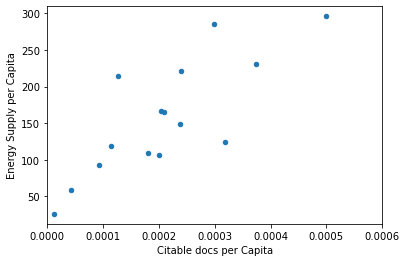

In [286]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot9()    
    

In [297]:
Top15 = answer_one()
median = Top15['% Renewable'].median()
Top15['renew'] = 0
Top15.loc[Top15['% Renewable']>=median,'renew'] = 1 

In [299]:
res = Top15['renew'].sort_values()
res

Country
United States         0
Japan                 0
United Kingdom        0
India                 0
South Korea           0
Iran                  0
Australia             0
China                 1
Russian Federation    1
Canada                1
Germany               1
France                1
Italy                 1
Spain                 1
Brazil                1
Name: renew, dtype: int64